In [33]:
import tweepy

#Twitter Configuration
CONSUMER_KEY    = 'B3259e9cbydl6xYWINkbehg3U'
CONSUMER_SECRET = 'R4Z6sTNBCpMzKCODrllaeoSoCEjcmrLJM0YdUDbp0i4DDzO8VK'

# Access Configuration:
ACCESS_TOKEN  = '1171305414-VntqBckF1jS3qeRy5BTzuiey1Nlcr6EuD1Owunz'
ACCESS_SECRET = 'RMgDsac6C4s6v8CQqE7clMMd3m2hQVXL7nU9ndowTR6wW'


def twitter_init():

    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [34]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [35]:
import matplotlib.pyplot as plt

def showPieChart(positive,neutral,negative):
    labels = 'Positive', 'Neutral', 'Negative'
    color = ['yellowgreen','gray','lightcoral']
    value = [positive, neutral, negative]
    explode = (0.1, 0.1, 0.1)
    plt.pie(value,autopct='%1.1f%%',colors=color, labels=labels , shadow= True,explode = explode , startangle=140)
    plt.show()

In [36]:
import pandas as pd     # To handle data
import numpy as np      # For number computing
from IPython.display import display

extractor = twitter_init()

#Change the Query on q param

query = "Stan Lee -filter:retweets" # query that we want to search
maxTweets = 1000 # NUmber of maximum tweets that is fetched
tweetsPerQuery = 100  # Maximum amount of tweets fetched in a particular time

sinceId = None  # if given time 
max_id = -1
tweetCount = 0

tweets = []

print("Maximum tweets taken {0}".format(maxTweets))
while tweetCount < maxTweets:
    try:
        if (max_id <= 0):
            if (not sinceId):
                new_tweets = extractor.search(q=query, lang="en", count=tweetsPerQuery)
            else:
                new_tweets = extractor.search(q=query, lang="en", count=tweetsPerQuery, since_id=sinceId)
        else:
            if (not sinceId):
                new_tweets = extractor.search(q=query, lang="en", count=tweetsPerQuery,max_id=str(max_id - 1))
            else:
                new_tweets = extractor.search(q=query, lang="en", count=tweetsPerQuery, max_id=str(max_id - 1), since_id=sinceId)
        if not new_tweets:
            print("No tweets relating to keyword")
            break
        tweetCount += len(new_tweets)
        tweets.append(new_tweets)
        print("Tweets fetched {0}".format(tweetCount))
        
        max_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # Just exit if any error
        print("Error : " + str(e))
        break      
        
print("Successfully fetched with the amount of {0} ".format(maxTweets))

Maximum tweets taken 1000
Tweets fetched 100
Tweets fetched 200
Tweets fetched 300
Tweets fetched 400
Tweets fetched 500
Tweets fetched 600
Tweets fetched 700
Tweets fetched 800
Tweets fetched 900
Tweets fetched 1000
Successfully fetched with the amount of 1000 


In [37]:
import nltk
nltk.download('stopwords')

data = pd.DataFrame()
for i in range(len(tweets)):
    temp_data = pd.DataFrame(data=[tweet.text for tweet in tweets[i]], columns=['Tweets'])
    temp_data['Date'] = np.array([tweet.created_at for tweet in tweets[i]])
    temp_data['Source'] = np.array([tweet.source for tweet in tweets[i]])
    temp_data['Likes']  = np.array([tweet.favorite_count for tweet in tweets[i]])
    temp_data['RTs']    = np.array([tweet.retweet_count for tweet in tweets[i]])
    data = data.append(temp_data, ignore_index=True)
      
display(data)
data.to_csv('tweets.csv', sep='\t', encoding='utf-8')

[nltk_data] Downloading package stopwords to C:\Users\Fahmi
[nltk_data]     Zufarian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweets,Date,Source,Likes,RTs
0,Stephen Hawking\nStefan Karl Stefansson\nStan ...,2018-11-28 16:55:33,Twitter for Android,0,0
1,Midweek workday podcast entertainment:\n@Babyl...,2018-11-28 16:55:13,Twitter Web Client,0,0
2,Stan Lee's Cause of Death is Revealed | Daily ...,2018-11-28 16:55:06,Google,0,0
3,Interview: 'Into the Spider-Verse' Producers P...,2018-11-28 16:55:00,Buffer,0,0
4,@UpToTASK wait until you see the stan lee came...,2018-11-28 16:54:51,TweetDeck,0,0
5,Also first marvel movie to be released post St...,2018-11-28 16:54:49,Twitter for Android,1,0
6,@TheRealRaNon Doesn't it seem like Wilson Fisk...,2018-11-28 16:54:35,Twitter Web Client,0,0
7,"For more on #IntoTheSpiderVerse, here's my exc...",2018-11-28 16:54:15,TweetDeck,6,0
8,My childhood is going down in a blaze of sadne...,2018-11-28 16:53:47,Twitter for iPhone,0,0
9,When you forget to turn your notifs back on🤦♂️,2018-11-28 16:53:23,Twitter for Android,0,0


In [38]:
import string
import re
 
from nltk.corpus import stopwords 
stopwords_english = stopwords.words('english')
 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
 
from nltk.tokenize import TweetTokenizer
from nltk.tokenize.moses import MosesTokenizer, MosesDetokenizer
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';(', '’', '‘'
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
 
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(word)
 
    return tweets_clean

clear_tweet = []
for tweet in data['Tweets']:
    result = clean_tweets(tweet)
    
    clear_tweet.append(detokenized)     

ModuleNotFoundError: No module named 'nltk.tokenize.moses'

In [39]:
clean_data = pd.DataFrame(data=[tweet for tweet in clear_tweet], columns=['Tweets'])
display(clean_data.head())

AssertionError: 1 columns passed, passed data had 25 columns

In [40]:
# Panda dataframe
data_fix = pd.DataFrame(data=[tweet for tweet in data['Tweets']], columns=['Tweets'])
data_fix['Clean_Tweets']  = np.array([tweet for tweet in data['Tweets']])
data_fix['Sentimen_Analysis'] = np.array([analize_sentiment(tweet) for tweet in data['Tweets']])

display(data_fix.head(20))

pos_tweets = [ tweet for index, tweet in enumerate(data_fix['Tweets']) if data_fix['Sentimen_Analysis'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data_fix['Tweets']) if data_fix['Sentimen_Analysis'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data_fix['Tweets']) if data_fix['Sentimen_Analysis'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data_fix['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data_fix['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data_fix['Tweets'])))

,Tweets,Clean_Tweets,Sentimen_Analysis
0,Stephen Hawking\nStefan Karl Stefansson\nStan ...,Stephen Hawking\nStefan Karl Stefansson\nStan ...,0
1,Midweek workday podcast entertainment:\n@Babyl...,Midweek workday podcast entertainment:\n@Babyl...,0
2,Stan Lee's Cause of Death is Revealed | Daily ...,Stan Lee's Cause of Death is Revealed | Daily ...,0
3,Interview: 'Into the Spider-Verse' Producers P...,Interview: 'Into the Spider-Verse' Producers P...,0
4,@UpToTASK wait until you see the stan lee came...,@UpToTASK wait until you see the stan lee came...,-1
5,Also first marvel movie to be released post St...,Also first marvel movie to be released post St...,1
6,@TheRealRaNon Doesn't it seem like Wilson Fisk...,@TheRealRaNon Doesn't it seem like Wilson Fisk...,1
7,"For more on #IntoTheSpiderVerse, here's my exc...","For more on #IntoTheSpiderVerse, here's my exc...",1
8,My childhood is going down in a blaze of sadne...,My childhood is going down in a blaze of sadne...,1
9,When you forget to turn your notifs back on🤦♂️,When you forget to turn your notifs back on🤦♂️,0


Percentage of positive tweets: 40.3%
Percentage of neutral tweets: 40.3%
Percentage of negative tweets: 19.4%


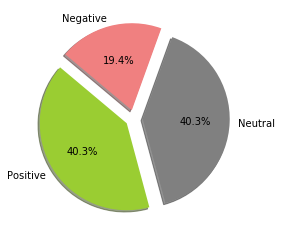

In [41]:
showPieChart(positive=len(pos_tweets),neutral=len(neu_tweets),negative=len(neg_tweets))

In [42]:
pd.Series(''.join(data_fix['Clean_Tweets']).lower().split()).value_counts()[:30]

stan          706
lee           553
of            347
the           340
and           303
stephen       212
a             189
to            179
death         169
in            150
now           141
i             131
is            123
cause         120
you           102
hillenburg    101
lee,          100
this           99
lee's          94
marvel         81
was            80
for            75
we             74
creator        69
comics         68
lee’s          66
that           64
my             63
died           60
revealed       58
dtype: int64

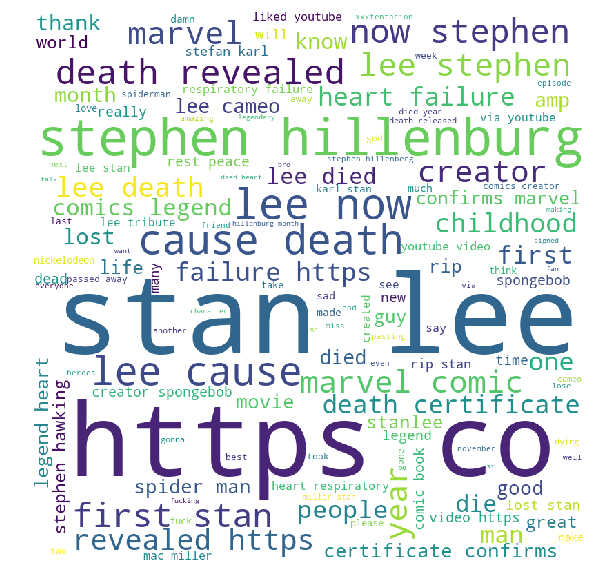

In [43]:
from wordcloud import WordCloud

comment_words = ' '

for val in data_fix['Clean_Tweets']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 